# Solar Induced Chlorophyll Fluorescence impacts in a nutshell
#### Christian Frankenberg

This Jupyter notebook will go through the most important aspects of the impact of solar induced chlorophyll fluorescence (SIF) on measured reflectance spectra at various spectral resolutions. The primary goal of this exercise is to gain a deeper understanding of the effect of SIF on measured spectra and the changes in the telluric and solar absorption features. This will help understand how the retrieval methodology works. 
We will first start with construction solar spectra using baseline spectra as well as high-resolution solar transmission spectra, which include absorption feautures in the sun's photosphere, so-called Fraunhofer lines. Then, we construct atmospheric transmission spectra ignoring aspects of atmospheric scattering for simplicity. 

In the absence of atmospheric scattering (purely geometric considerations here), a measured Nadir (downward looking) measurement $L_\lambda$ over lambertian surface with wave-length dependent reflectance $\rho_\lambda$ can be written as:
$$L_\lambda = \frac{L_{\lambda0}\mu_0\rho_\lambda T_\lambda\downarrow T_\lambda\uparrow}{\pi} + SIF_\lambda T_\lambda\uparrow $$ with $L_{\lambda0}$ being the solar irradiance spectrum, $\mu_0$ the cosine of the solar zenith angle SZA and $T_\lambda$ the atmospheric transmission along the lightpath of the photons reaching the detector (which might be right above the canopy or in space), separated by up and downwelling (using arrows).

In the following, we will go through every step of construction such a spectrum in the simple setup described above.




First import usual libraries

In [1]:
## Make sure plots are create inline
%matplotlib inline
## The usual packages (numpy, matplotlib, etc)
from RSE_style import *
figsize(10,8)
# Import gaussian 1D filter for convolution (can also go via numpy convolve and create own instrument function)
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d

# Solar Transmission part 

Read in solar transmission spectrum (disk integrated). A generated spectrum using a solar line-list (not a low resolution measured spectrum) can be downloaded at
http://mark4sun.jpl.nasa.gov/toon/solar/solar_spectrum.html
The solar transmission spectrum is basically calculated from a tabulated line-list (strength and width) compiled by Geoff Toon from JPL. These absorption features are caused by absorptions of trace elements in the solar photosphere. 

In [2]:
# Read in tabulated pre-computed dataset.
sun = np.loadtxt('data/solar_merged_20160127_600_26316_100.out')
sun_diskCentered = np.loadtxt('data/solar_merged_20160127_600_26316_000.out')

In [3]:
# interpolate to common grid in wavelength (not wavenumber), use 0.002nm sampling here
res = 0.002
# create wavelength grid in nm
wl = np.arange(600,870,res)
# Solar transmission spectrum, resample to wavelength grid (from wavenumber):
f = interp1d(1.e7/sun[:,0], sun[:,1])
f2 = interp1d(1.e7/sun_diskCentered[:,0], sun_diskCentered[:,1])
Tsun = f(wl)
Tsun_diskCenter = f2(wl)
co = 2.355
T_005 = gaussian_filter1d(Tsun, 0.07/res/co)
T_015 = gaussian_filter1d(Tsun, 0.11/res/co)
T_025 = gaussian_filter1d(Tsun, 0.25/res/co)
T_050 = gaussian_filter1d(Tsun, 0.50/res/co)

Text(0.5,1,'Disk Integrated Solar Transmission Spectrum')

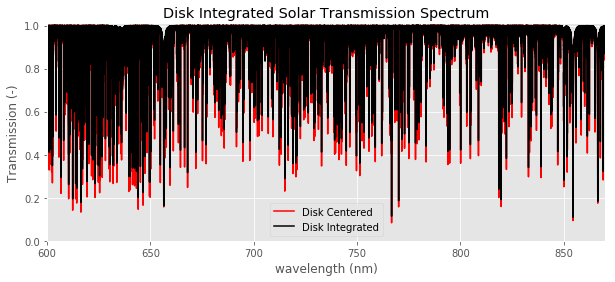

In [4]:
figsize(10,4)

plt.plot(wl,Tsun_diskCenter,'r',  label='Disk Centered');
plt.plot(wl,Tsun,'k',label='Disk Integrated');
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0.0,1.01])
plt.legend(loc=0)
plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Disk Integrated Solar Transmission Spectrum")
#plt.savefig('plots/solar_transmission_spectrum.pdf')

Text(0,0.5,'$\\Delta$')

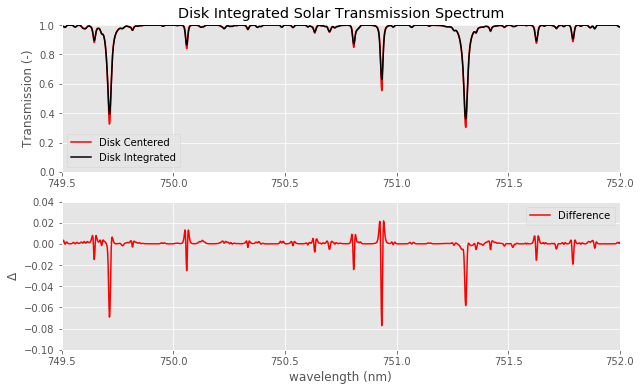

In [5]:
figsize(10,6)
plt.subplot(211)
plt.plot(wl,Tsun_diskCenter,'r',  label='Disk Centered');
plt.plot(wl,Tsun,'k',label='Disk Integrated');
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0.0,1.01])
plt.xlim([749.5,752])
plt.legend(loc=0)
#plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Disk Integrated Solar Transmission Spectrum")
plt.subplot(212)
plt.plot(wl,Tsun_diskCenter-Tsun,'r',  label='Difference');
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([-0.1,0.04])
plt.xlim([749.5,752])
plt.legend(loc=0)
plt.xlabel('wavelength (nm)')
plt.ylabel('$\Delta$')

#plt.savefig('plots/solar_transmission_spectrum_zoom.pdf')

Look at different instrument spectra resolutions of the same, transmission spectrum will have to be convolved with a Gaussian Instrument Lineshape (ILS). Usually, we define the spectral resolution in terms of Full Width at Half Maximum (FWHM, https://en.wikipedia.org/wiki/Full_width_at_half_maximum), which relates to the standard deviation of a gaussian ($\sigma$) by $$FWHM = 2\sqrt{2\ln2}\sigma \approx 2.355\sigma$$

The gaussian_filter1d function takes the $\sigma$ width in terms of sampling intervals, thus we need to divide the required FWHM in nm by the sampling interval and then by 2.355 to get from FWHM to $\sigma$


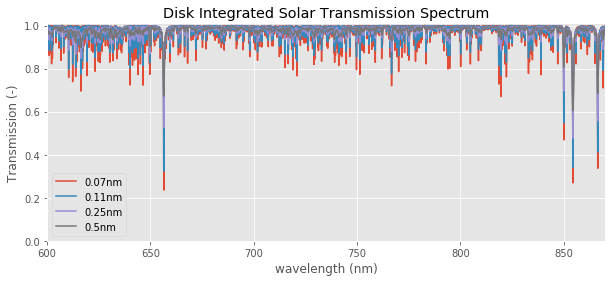

In [6]:

figsize(10,4)
plt.plot(wl,T_005,wl,T_015,wl,T_025,wl,T_050); 
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,1.01])
plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Disk Integrated Solar Transmission Spectrum")
plt.legend(['0.07nm','0.11nm','0.25nm','0.5nm'], loc=0)
#plt.savefig('plots/solar_transmission_spectrum_DiffResolution.pdf')

### Zoom into lower transmission range

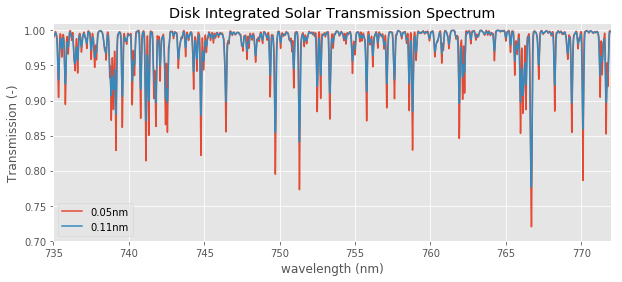

In [7]:
figsize(10,4)
plt.plot(wl,T_005,wl,T_015); 
plt.xlim([735,772])
plt.ylim([0.7,1.01])
plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Disk Integrated Solar Transmission Spectrum")
plt.legend(['0.05nm','0.11nm'], loc=0)
#plt.savefig('plots/solar_transmission_spectrum_ZoomCFIS.pdf')

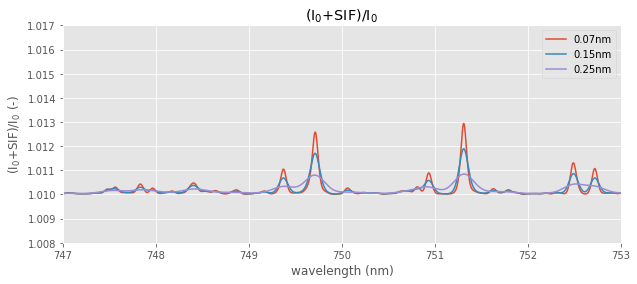

In [8]:
figsize(10,4)
plt.plot(wl,(T_005+0.01)/T_005,wl,(T_015+0.01)/T_015,wl,(T_025+0.01)/T_025); 
plt.xlim([747,753])
plt.ylim([1.008,1.017])
plt.xlabel('wavelength (nm)')
plt.ylabel('(I$_0$+SIF)/I$_0$ (-)')
plt.title("(I$_0$+SIF)/I$_0$")
plt.legend(['0.07nm','0.15nm','0.25nm'], loc=0)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
#plt.savefig('plots/solar_plusSIF.pdf')

Now get a solar spectrum (calibrated), this one is downloaded from http://kurucz.harvard.edu/sun/irradiance2005/irradthuwl.br_5nmresamp

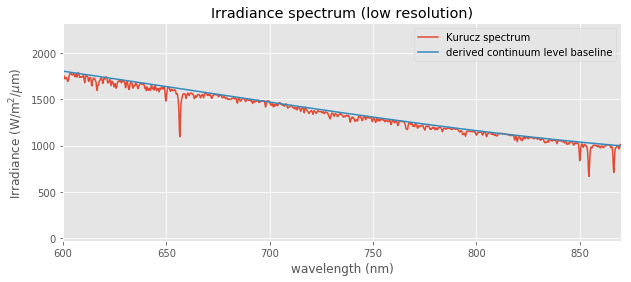

In [9]:
figsize(10,4)
# Load a lower resolution solar irradiance spectrum. We want to just get the continuum baseline from this and then 
# use the high resolution transmission spectrum to create a "real" solar spectrum
solar_irr = np.loadtxt('data/irradthuwl.br_5nmresamp')
plt.plot(solar_irr[:,0], solar_irr[:,1]*1e3)
plt.xlim([600,870])

plt.xlabel('wavelength (nm)')
plt.ylabel('Irradiance (W/m$^2$/$\mu$m)')
plt.title("Irradiance spectrum (low resolution)")
# Now just try to get the baseline extracted from this curve:
wl2 = np.arange(600,870,res)
s_base = wl2*0
for i in range(len(wl2)):
    sub = solar_irr[np.abs(solar_irr[:,0]-wl2[i])<4.,1]*1.e3
    s_base[i]=np.max(sub)
p = np.polyfit(wl2, s_base, 3) 
# Now evaluate polynomial at the high resolution grid defined before:
solar_baseline = np.polyval(p,wl)
plt.plot(wl,solar_baseline)
plt.legend(['Kurucz spectrum','derived continuum level baseline'])

Now we can construct a solar spectrum at arbitary resolution, lets pick the 0.05nm version

Text(0.5,1,'Disk Integrated Solar Irradiance Spectrum at 0.0nm spectral resolution')

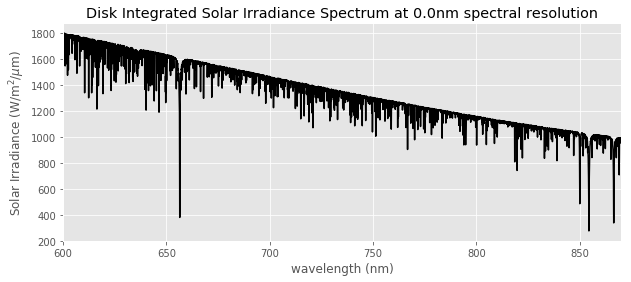

In [10]:
figsize(10,4)
plt.plot(wl,solar_baseline*T_005,'k'); 
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('Solar Irradiance (W/m$^2$/$\mu$m)')
plt.title("Disk Integrated Solar Irradiance Spectrum at 0.0nm spectral resolution")
#plt.savefig('plots/solar_spectrum_007nm.pdf')
#plt.legend(['0.05nm','0.15nm','0.25nm','0.5nm'], loc=0)

# Atmospheric Transmission

Now we have to look at atmospheric absorption features. Here, we focus on the primary absorptions by H$_2$O and O$_2$ (the so called A,B and C bands at 760nm, 685nm and 630nm). The absorption optical densities for a US standard atmosphere (1013hPa surface pressure, 50 layers) are pre-computed but could easily be repeated using the HITRAN spectral database. I used a simple Voigt spectral line-shape here, more sophisticated line-shapes will be needed for proper spectral fits (such as used for OCO-2, which includes line-mixing as well as collision induced absorption, both of which are very important within the O$_2$-A band).
I strongly suggest looking into the HAPI system for generating spectra using the HITRAN database in pure python: http://hitran.org/hapi/

Load pre-computed vertical optical density of O$_2$ and H$_2$O

In [11]:
o2 = np.loadtxt('data/o2_VOD.dat')
h2o = np.loadtxt('data/h2o_VOD.dat')

Transmission computed through Beers law: $I=Io\cdot \exp(-AMF*VOD)$
With AMF being the airmass factor $1/cos(SZA)+1/cos(LZA)$ and VOD the vertically integrated optical density of the absorber. At the ground, we ignore $1/cos(LZA)$ and would need only parts of it if we put the observer into the atmosphere (the equation above is for space borne observations and geometric light-path only)

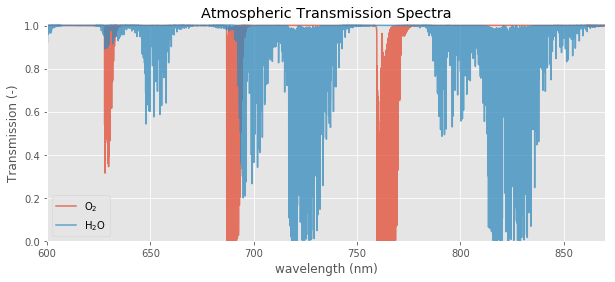

In [12]:
# Solar Zenith Angle of 20 degrees assumed here
SZA = 20.0
AMF = 1./np.cos(SZA/180.*np.pi)
plt.plot(o2[:,0], np.exp(-AMF*o2[:,1]), h2o[:,0], np.exp(-AMF*h2o[:,1]), alpha=0.75)
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,1.01])
plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Atmospheric Transmission Spectra")
plt.legend(['O$_2$','H$_2$O'], loc=0)

In [13]:
T_005_h2o = gaussian_filter1d(np.exp(-AMF*h2o[:,1]), 0.05/res/co)
T_015_h2o = gaussian_filter1d(np.exp(-AMF*h2o[:,1]), 0.15/res/co)
T_025_h2o = gaussian_filter1d(np.exp(-AMF*h2o[:,1]), 0.25/res/co)
T_005_o2 = gaussian_filter1d(np.exp(-AMF*o2[:,1]), 0.05/res/co)
T_015_o2 = gaussian_filter1d(np.exp(-AMF*o2[:,1]), 0.15/res/co)
T_025_o2 = gaussian_filter1d(np.exp(-AMF*o2[:,1]), 0.25/res/co)
T_005_h2o_nadir = gaussian_filter1d(np.exp(-h2o[:,1]), 0.05/res/co)
T_005_o2_nadir = gaussian_filter1d(np.exp(-o2[:,1]), 0.05/res/co)
T_005_h2o_nadir_10percent = gaussian_filter1d(np.exp(-h2o[:,1]/10.), 0.05/res/co)
T_005_o2_nadir_10percent = gaussian_filter1d(np.exp(-o2[:,1]/10.), 0.05/res/co)
T_005_o2_nadir_1percent = gaussian_filter1d(np.exp(-o2[:,1]/500.), 0.05/res/co)

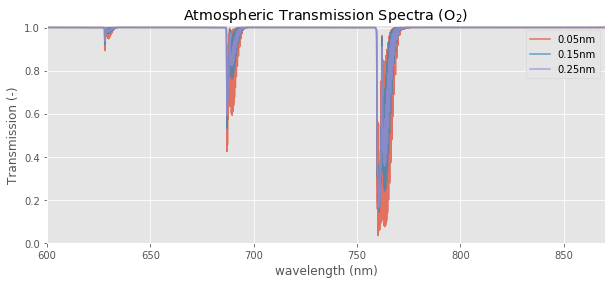

In [14]:
figsize(10,4)
plt.plot(wl,T_005_o2,wl,T_015_o2,wl,T_025_o2, alpha=0.75); 
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,1.01])
plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Atmospheric Transmission Spectra (O$_2$)")
plt.legend(['0.05nm','0.15nm','0.25nm'], loc=0)

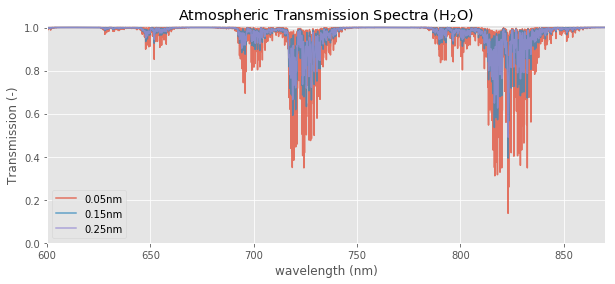

In [15]:
figsize(10,4)
plt.plot(wl,T_005_h2o,wl,T_015_h2o,wl,T_025_h2o, alpha=0.75); 
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,1.01])
plt.xlabel('wavelength (nm)')
plt.ylabel('Transmission (-)')
plt.title("Atmospheric Transmission Spectra (H$_2$O)")
plt.legend(['0.05nm','0.15nm','0.25nm'], loc=0)


# Combine transmission and solar irradiance
Now we can start combining all the transmission curves with the solar irradiance. Total transmission T is $T=\prod T_i$, which can be multiplied with the basline irradiance spectrum, ignoring effects of atmospheric scattering here (which are low but non-negligible in this wavelength range)

In [16]:
co = 2.355
T_005 = gaussian_filter1d(Tsun, 0.07/res/co)
T_015 = gaussian_filter1d(Tsun, 0.15/res/co)
T_025 = gaussian_filter1d(Tsun, 0.25/res/co)
T_050 = gaussian_filter1d(Tsun, 0.50/res/co)

Text(0.5,1,'Disk Integrated Solar Irradiance Spectrum at 0.05nm spectral resolution at surface level')

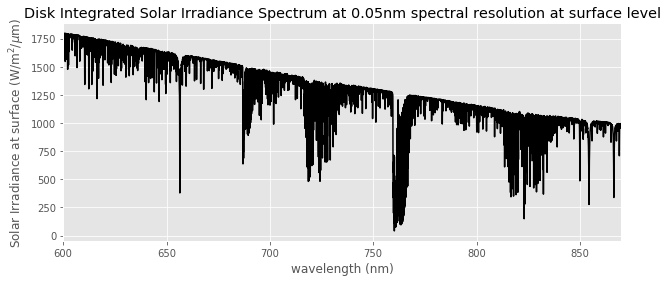

In [17]:
figsize(10,4)
plt.plot(wl,solar_baseline*T_005*T_005_h2o*T_005_o2,'k'); 
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('Solar Irradiance at surface (W/m$^2$/$\mu$m)')
plt.title("Disk Integrated Solar Irradiance Spectrum at 0.05nm spectral resolution at surface level")

We can also separate by individual contributions (even though there is non-linar mixing in the transmission product, so it is not absolutely correct but you will get the gist of it)

Text(0.5,1,'Disk Integrated Solar Irradiance Spectrum at 0.05nm spectral resolution at surface level')

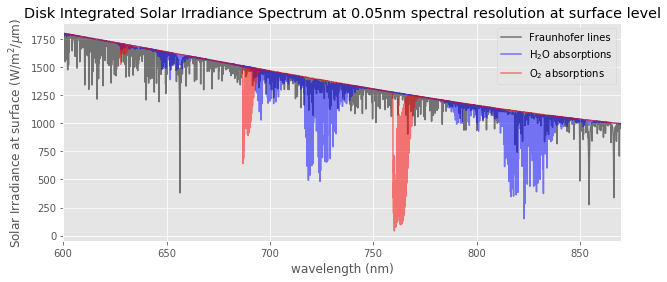

In [18]:
figsize(10,4)
plt.plot(wl,solar_baseline*T_005,'k',wl,solar_baseline*T_005_h2o,'b',wl,solar_baseline*T_005_o2,'r', alpha=0.5); 
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('Solar Irradiance at surface (W/m$^2$/$\mu$m)')
plt.legend(['Fraunhofer lines','H$_2$O absorptions','O$_2$ absorptions'], loc=0)
plt.title("Disk Integrated Solar Irradiance Spectrum at 0.05nm spectral resolution at surface level")
#plt.savefig('plots/total_irradiance_surface.pdf')

(0, 1500)

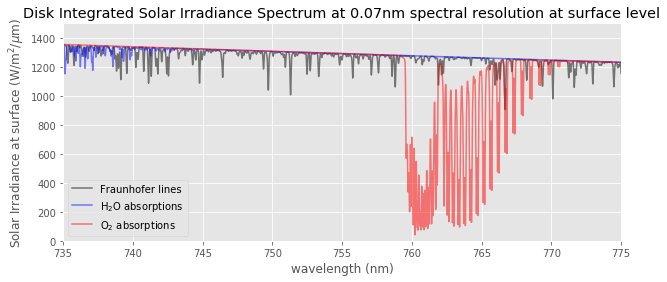

In [19]:
figsize(10,4)
plt.plot(wl,solar_baseline*T_005,'k',wl,solar_baseline*T_005_h2o,'b',wl,solar_baseline*T_005_o2,'r', alpha=0.5); 
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('Solar Irradiance at surface (W/m$^2$/$\mu$m)')
plt.legend(['Fraunhofer lines','H$_2$O absorptions','O$_2$ absorptions'], loc=0)
plt.title("Disk Integrated Solar Irradiance Spectrum at 0.07nm spectral resolution at surface level")
plt.xlim((735,775))
plt.ylim((0,1500))
#plt.savefig('plots/total_irradiance_surfaceCFIS.pdf')

# Reflectance part
Here, we use some simple Sail reflectance calculations to show the impact of SIF. The displayed data reflect canopy reflectance with a fixed Leaf Area Index of 3 but variable Chlorophyll content. The chlorophyll content strongly affects both the reflectance but also the SIF emission spectrum as there is strong absporption below 740nm (and high reflectance above it), which is the primary reason for the occurence of the red-edge feature, the steep increase in reflectance beyond 700nm. Digital photography beyond 700nm is so-called near infrared photography with regular cameras having a short-pass filter installed in front of the detector as images would otherwise look unnatural. This can be changed and allows for beautiful photography, see for example http://tomprince.org/

In [20]:
R = np.loadtxt('data/reflectance_FluorSail.txt')
# just getting some index right, no other use
wo = np.arange(13,17,1)
print(wo, R.shape)

[13 14 15 16] (601, 21)


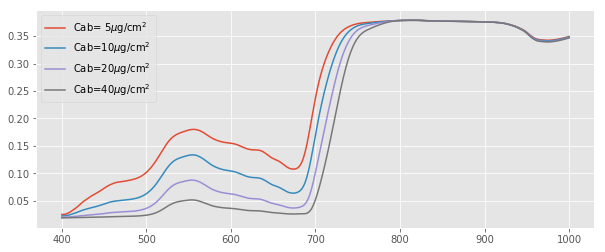

In [21]:
plt.plot(R[:,0], R[:,wo])
plt.legend( (r'Cab= 5$\mu$g/cm$^2$ ',r'Cab=10$\mu$g/cm$^2$ ',r'Cab=20$\mu$g/cm$^2$ ',r'Cab=40$\mu$g/cm$^2$'),loc=0)

Now zoom into our key spectral range from 600 through 870nm

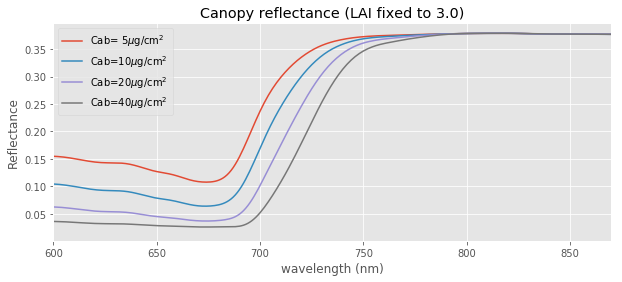

In [22]:
plt.plot(R[:,0], R[:,wo[0:4]])
plt.legend( (r'Cab= 5$\mu$g/cm$^2$ ',r'Cab=10$\mu$g/cm$^2$ ',r'Cab=20$\mu$g/cm$^2$ ',r'Cab=40$\mu$g/cm$^2$'),loc=0)
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('Reflectance')
plt.title("Canopy reflectance (LAI fixed to 3.0)")
plt.savefig('plots/canopy_reflectance.pdf')

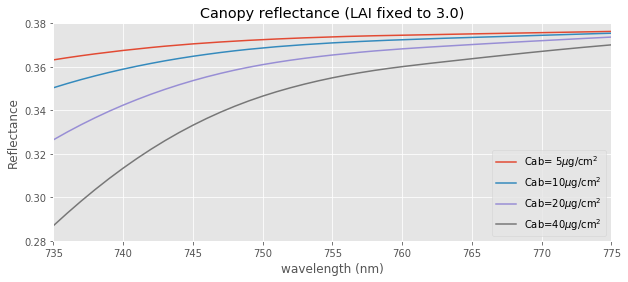

In [23]:
# Another zoom to OCO-2 retrieval window, sowing how non-linear this can be!
plt.plot(R[:,0], R[:,wo[0:4]])
plt.legend( (r'Cab= 5$\mu$g/cm$^2$ ',r'Cab=10$\mu$g/cm$^2$ ',r'Cab=20$\mu$g/cm$^2$ ',r'Cab=40$\mu$g/cm$^2$'),loc=0)
plt.xlim([735,775])
plt.ylim([0.28,0.38])
plt.xlabel('wavelength (nm)')
plt.ylabel('Reflectance')
plt.title("Canopy reflectance (LAI fixed to 3.0)")
plt.savefig('plots/canopy_reflectance_O2Aband_CFIS.pdf')

In [24]:
ft = np.genfromtxt('data/Ftspec.txt',delimiter=',')
fm = np.genfromtxt('data/Fmspec.txt',delimiter=',')

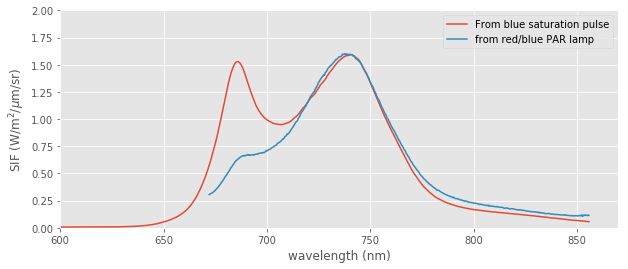

In [25]:
plt.plot(fm[0,:-7], fm[1,:-7]/23, ft[0,520:-7], ft[1,520:-7])
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,2])
plt.xlabel('wavelength (nm)')
plt.ylabel('SIF (W/m$^2$/$\mu$m/sr)')
plt.legend(['From blue saturation pulse','from red/blue PAR lamp'])

We want to get a rough estimate of SIF extended to the full 870nm window, so I just try a linear extrapolation here (a small kludge). The results look kind of reasonable though and should provide us some estimate as to how SIF looks like beyond our measured 850nm

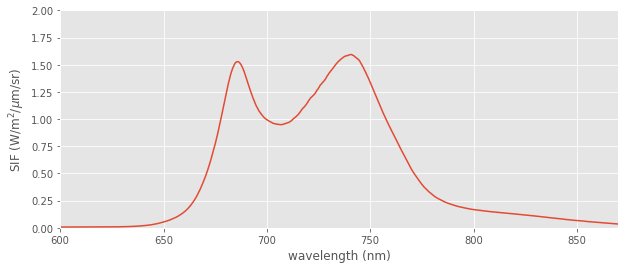

In [26]:
fm[0,-7]=870
fm[1,-7]=0.8
f_sif = interp1d(fm[0,:-6], fm[1,:-6]/23)
sif = f_sif(wl)
plt.plot(fm[0,:-6], fm[1,:-6]/23)
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,2])
plt.xlabel('wavelength (nm)')
plt.ylabel('SIF (W/m$^2$/$\mu$m/sr)')
plt.savefig('plots/SIF_spectrum.pdf')

Now we can construct a full back-scattered spectrum at the top-of-canopy. We can calculate the radiance $L_\lambda$ as $$L_\lambda = L_{\lambda0}\mu_0\rho_\lambda/\pi$$ with $\rho_\lambda$ being the spectrally resolved reflectance and $L_{\lambda0}$ the solar irradiance spectrum and $\mu_0$ the cosine of the solar zenith angle SZA.
We will first start without taking actual absorption features into account (i.e. a flat atmospheric transmission of 1)

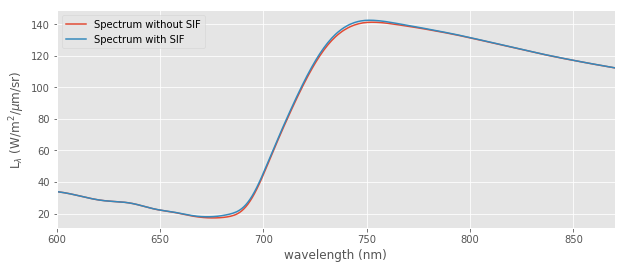

In [27]:
# First choose a reflectance spectrum and interpolate:
rho = interp1d(R[:,0], R[:,wo[2]])
plt.plot(wl,solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi), wl,solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)+sif)
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')
plt.legend(['Spectrum without SIF','Spectrum with SIF'],loc=0)

Now we try to look at all absorption features as well, adding in the tranmission terms: 

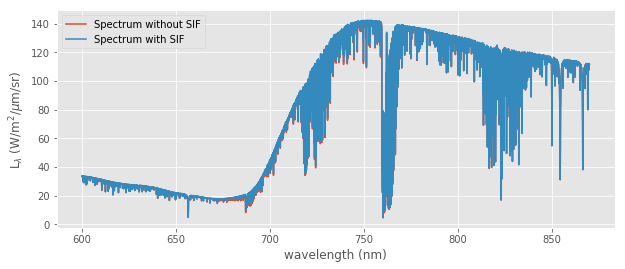

In [28]:
# One with all spectral features
L = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)*T_005*T_005_h2o*T_005_o2
# generate one without spectral features:
Lo = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)
# One with only Fraunhofer lines
L_fraun = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)*T_005
plt.plot(wl,L, wl,L+sif)

plt.xlabel('wavelength (nm)')
plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')
plt.legend(['Spectrum without SIF','Spectrum with SIF'],loc=0)

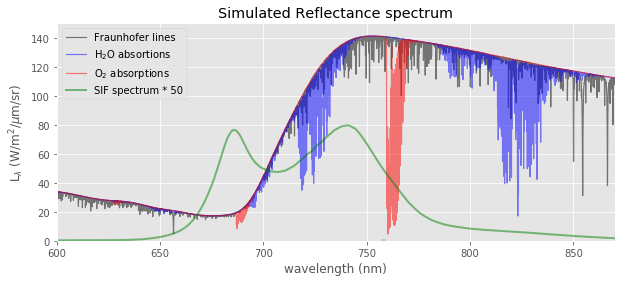

In [29]:
# One with all spectral features
L1 = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)*T_005
L2 = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)*T_005_h2o
L3 = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)*T_005_o2
# generate one without spectral features:
Lo = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)
# One with only Fraunhofer lines
L_fraun = solar_baseline*rho(wl)/np.pi*np.cos(SZA/180.*np.pi)*T_005
plt.plot(wl, L1,'k', wl, L2,'b', wl, L3,'r', alpha=0.5,lw=1.2)
plt.plot(fm[0,:-6], fm[1,:-6]/23*50,'g', alpha=0.5,lw=2.)
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([0,150])
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')
plt.legend(['Fraunhofer lines','H$_2$O absortions','O$_2$ absorptions','SIF spectrum * 50'],loc=0)
plt.title('Simulated Reflectance spectrum')
plt.fill_between([757,759],0,[1.01,1.01], color='green',alpha=0.2)
#plt.savefig('plots/total_reflected_surfaceCFIS.pdf')

The most interesting part, however, is the ratio spectrum, ie the spectrum with fluorescence and without fluorescence. Due to the strong absorption features of the incoming light and the fact that SIF is a pure emission right in front of the observer at Top-of-canopy, the deepest lines are most filled in.

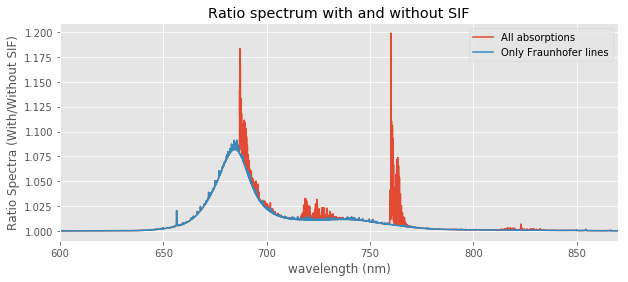

In [30]:
plt.plot(wl,(L+sif)/L, wl,(L_fraun+sif)/L_fraun )
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
plt.ylabel('Ratio Spectra (With/Without SIF)')
plt.legend(['All absorptions','Only Fraunhofer lines'],loc=0)
plt.title('Ratio spectrum with and without SIF')
plt.savefig('plots/SIF_impact.pdf')

Text(0.5,1,'Difference of log(spectrum) with and without SIF')

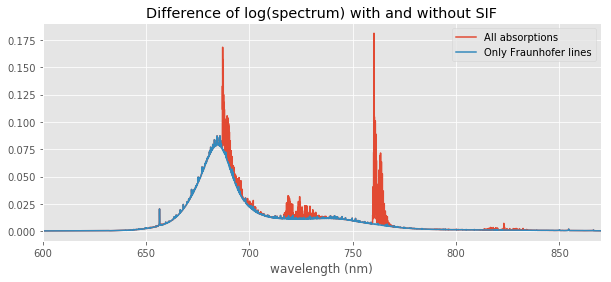

In [31]:
plt.plot(wl,np.log(L+sif)-np.log(L), wl,np.log(L_fraun+sif)-np.log(L_fraun) )
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('wavelength (nm)')
#plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')
plt.legend(['All absorptions','Only Fraunhofer lines'],loc=0)
plt.title('Difference of log(spectrum) with and without SIF')

Text(850,1.015,'SCIAMACHY (Ca II)')

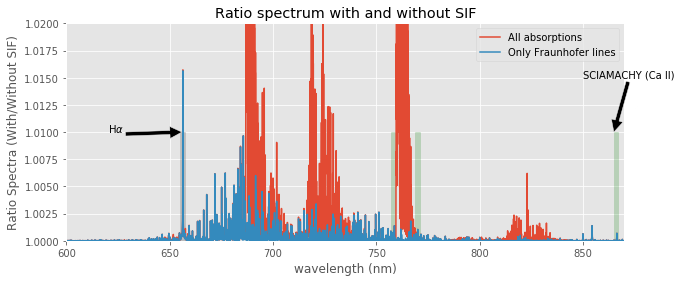

In [32]:
plt.plot(wl,(L+sif)/L/((Lo+sif)/Lo), wl,(L_fraun+sif)/L_fraun/((Lo+sif)/Lo) )
plt.xlim([np.min(wl),np.max(wl)])
plt.ylim([1,1.02])
plt.xlabel('wavelength (nm)')
plt.ylabel('Ratio Spectra (With/Without SIF)')
plt.legend(['All absorptions','Only Fraunhofer lines'],loc=0)
plt.title('Ratio spectrum with and without SIF')
plt.fill_between([865,867],0,[1.01,1.01], color='green',alpha=0.2)
plt.fill_between([757,759],0,[1.01,1.01], color='green',alpha=0.2)
plt.fill_between([769,771],0,[1.01,1.01], color='green',alpha=0.2)
plt.fill_between([655,657.5],0,[1.01,1.01], color='gray',alpha=0.4)
plt.annotate(r'H$\alpha$', xy=(656, 1.01), xytext=(620, 1.01),
            arrowprops=dict(facecolor='black'))
plt.annotate(r'SCIAMACHY (Ca II)', xy=(865, 1.01), xytext=(850, 1.015),
            arrowprops=dict(facecolor='black'))

#plt.savefig('plots/SIF_impact2.pdf')

This graph illustrates the profound impact of SIF on the general reflectance spectrum (the broad-band variation) as well as the depth of the absorption features, separated here into Fraunhofer features as well as telluric lines. The broad overall bump at 680nm is mainly due to the fact that the SIF signal is much higher compared to the lower general reflectance in this range. Ideally, this signal could be used to retrieve SIF but the broad-band features in the reflectance can be compounded by other factors that impact the reflectance shape in general, making it hard to disentangle the spectral shape of SIF from variation in the surface reflectance. The filling-in of absorption features, on the other hand, can only be caused by an additive source at the bottom while any change in reflectance is a multiplicative term, which is not changing the depths of absorption features. As you can see, the strongest features are indeed caused by the oxygen bands at 760 and 865nm, which is the primary reason these have been used for ground-based observations for a long time. The changes caused by Fraunhofer lines are more subtle but have the advantage that they are not affected by changes in the photon-path length within the atmosphere, which will affect the depth of both O$_2$ as well as H$_2$ lines. 


Text(0.5,0,'wavelength (nm)')

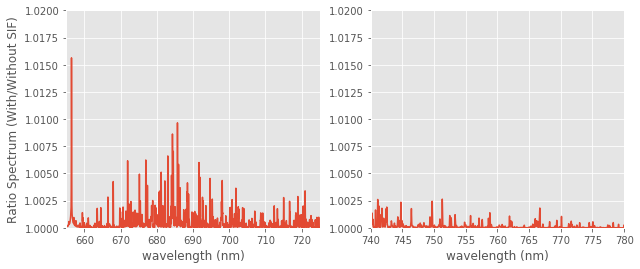

In [33]:
plt.subplot(1,2,1)
plt.plot(wl,(L_fraun+sif)/L_fraun/((Lo+sif)/Lo) )
plt.xlim([655,725])
plt.ylim([1.0,1.02])
plt.xlabel('wavelength (nm)')
plt.ylabel('Ratio Spectrum (With/Without SIF)')
#plt.legend(['All absorptions','Only Fraunhofer lines'],loc=0)
plt.subplot(1,2,2)
plt.plot(wl,(L_fraun+sif)/L_fraun/((Lo+sif)/Lo) )
plt.xlim([740,780])
plt.ylim([1.00,1.02])
plt.xlabel('wavelength (nm)')
#plt.savefig('plots/SIF_impact_zoom.pdf')
#plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')

What we saw before is that there is a distinct spectral feature create by Fraunhofer and telluric lines but the question remains whether it is too subtle to be detectable or not, mostly based on the noise behavior and stability of the detector. So what we would need is some kind of noise model to check whether these spectral features stay within the noise or not. For simplicity, we assume a pure shot-noise (https://en.wikipedia.org/wiki/Shot_noise) behavior, which scales like $$\sigma = b*\sqrt{L}$$, with L being the measured radiance and $b$ a proportionality constant (summarizing the physical aspects in shot-noise). In principle, we shall add a constant readout-noise term but we leave that for now. As a consequence, this noise model here would thus underestimate the noise at very low signal levels

Text(0,0.5,'Signal-to-noise ratio')

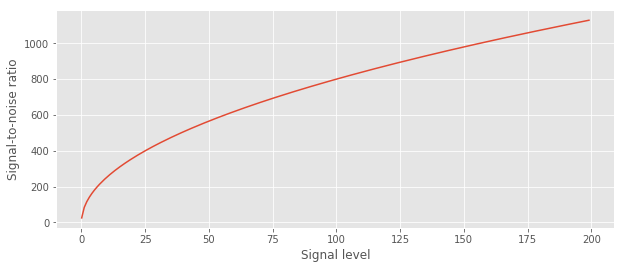

In [34]:
# Generate some noise model, taken here from some estimates we gained from our airborne spectrometer,
# which actually has a very good sognal to noise behavior

# signal array (from 0-200 W/m2/sr/µm)
sig = np.arange(0.1,200,1)
noise = np.sqrt(sig)/80
plt.plot(sig,sig/noise)
plt.xlabel('Signal level')
plt.ylabel('Signal-to-noise ratio')

So, how would such a noise behavior be reflected in a real spectral measurement, which has a high dynamic range? If we are dealing with a Fourier Transform System, the absolute noise level across the entire spectrum would be constant but for a typical grating spectrometer with individual detector elements per wavelengths, the above noise model holds for each spectral element. Hence, we can easily derive the noise terms for our reflected light spectrum define above:

Text(0,0.5,'Signal-to-noise ratio')

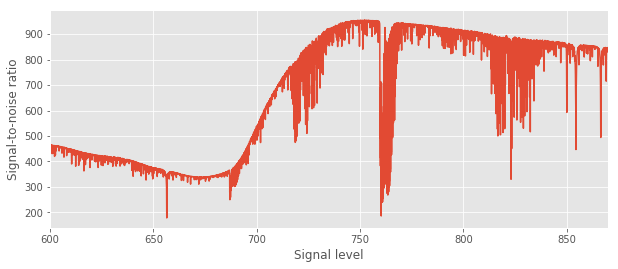

In [35]:
# Measurement
F = L+sif

noise = np.sqrt(F)/80.
plt.plot(wl,F/noise)
plt.xlim([np.min(wl),np.max(wl)])
plt.xlabel('Signal level')
plt.ylabel('Signal-to-noise ratio')

In [36]:
# Let us generate a simple "noisy" spectrum using a random generator
# create normal distributed random variable and subsample the original 0.002nm sampling to 0.01nm
step = 5
s = np.random.standard_normal(len(wl[0:-1:step]))
sigma = s*noise[0:-1:step]

(600.0, 869.99799999361539)

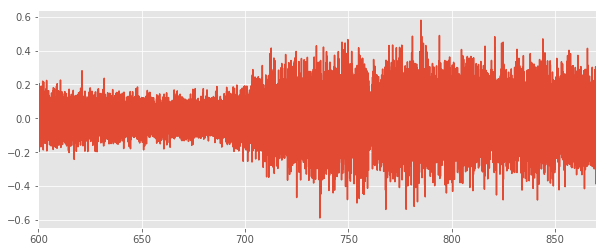

In [37]:
plt.plot(wl[0:-1:step],sigma)
plt.xlim([np.min(wl),np.max(wl)])

(600.0, 869.99799999361539)

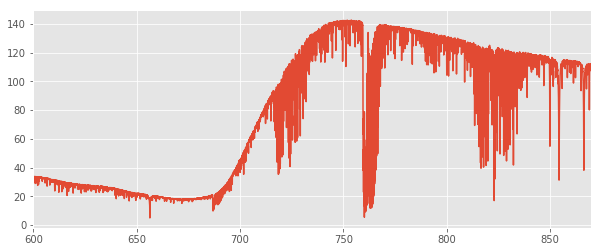

In [38]:
plt.plot(wl[0:-1:step],F[0:-1:step]+sigma)
plt.xlim([np.min(wl),np.max(wl)])

(600.0, 869.99799999361539)

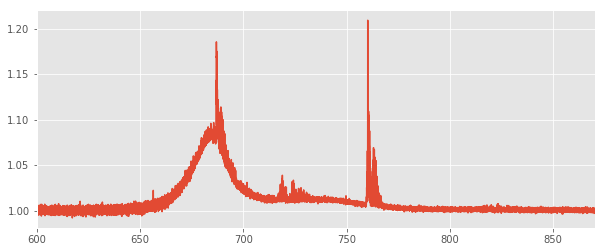

In [39]:
plt.plot(wl[0:-1:step],(F[0:-1:step]+sigma)/L[0:-1:step])
plt.xlim([np.min(wl),np.max(wl)])

Text(0.5,0,'wavelength (nm)')

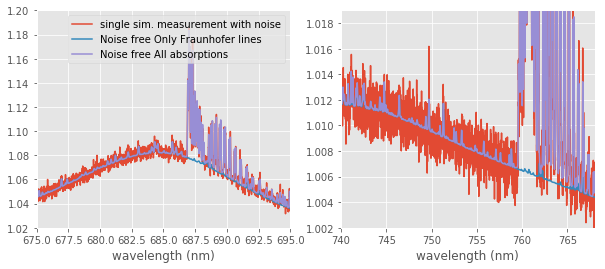

In [40]:
plt.subplot(1,2,1)
plt.plot(wl[0:-1:step],(F[0:-1:step]+sigma)/L[0:-1:step])
plt.plot(wl,(L_fraun+sif)/L_fraun )
plt.plot(wl,(L+sif)/L)
plt.xlim([675,695])
plt.ylim([1.02,1.2])
plt.xlabel('wavelength (nm)')
#plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')
plt.legend(['single sim. measurement with noise','Noise free Only Fraunhofer lines','Noise free All absorptions'],loc=0)
plt.subplot(1,2,2)
plt.plot(wl[0:-1:step],(F[0:-1:step]+sigma)/L[0:-1:step])
plt.plot(wl,(L_fraun+sif)/L_fraun )
plt.plot(wl,(L+sif)/L)
plt.xlim([740,768])
plt.ylim([1.002,1.019])
plt.xlabel('wavelength (nm)')
#plt.savefig('plots/SIF_impact_noise.pdf')
#plt.ylabel('L$_\lambda$ (W/m$^2$/$\mu$m/sr)')

Now we see why the O$_2$ lines are usually being used on the ground, they are really the only features that stick out of the "weed", while most Fraunhofer lines really cause changes below the actual noise level. However, multispectral fitting will allow us to still determine the impact even though no individual spikes might be visible in a ratio spectrum like found here.

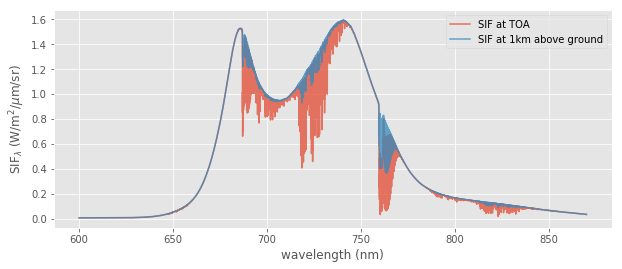

In [41]:
F2 = (L+sif)*T_005_h2o_nadir*T_005_o2_nadir
L2 = (L)*T_005_h2o_nadir*T_005_o2_nadir
F3 = (L+sif)*T_005_h2o_nadir_10percent*T_005_o2_nadir_10percent
L3 = (L)*T_005_h2o_nadir_10percent*T_005_o2_nadir_10percent
#noise2 = np.sqrt(F2)/40.
#sigma2 = s*noise2[0:-1:step]

#plt.plot(wl[0:-1:step],(F2[0:-1:step]+sigma2)-L2[0:-1:step])
plt.plot(wl,F2-L2, alpha=0.75 )
plt.plot(wl,F3-L3, alpha=0.75 )
plt.legend(['SIF at TOA','SIF at 1km above ground'])
#plt.plot(wl,(F2)/L2)
plt.xlabel('wavelength (nm)')
plt.ylabel('SIF$_\lambda$ (W/m$^2$/$\mu$m/sr)')
plt.savefig('plots/SIF_TOA_orAirborne.pdf')